In [38]:
%config IPCompleter.greedy=True
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
!pip install --no-cache-dir openpyxl


Benford's law, also called the Newcomb–Benford law, the law of anomalous numbers, or the first-digit law, is an observation that in many real-life sets of numerical data, the leading digit is likely to be small.

In sets that obey the law, the number 1 appears as the leading significant digit about 30 % of the time, while 9 appears as the leading significant digit less than 5 % of the time. If the digits were distributed uniformly, they would each occur about 11.1 % of the time. Benford's law also makes predictions about the distribution of second digits, third digits, digit combinations, and so on. 

A set of numbers is said to satisfy Benford's law if the leading digit d (d ∈ {1, ..., 9}) occurs with probability

    `P(d) = log(d+ 1) - log(d) = log(1 + 1/d)`

The leading digits in such a set thus have the following distribution: 

more at [wiki](https://en.wikipedia.org/wiki/Benford%27s_law)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


pd.set_option('display.float_format', '{:.1f}'.format)
# change current directory
cwd = os.getcwd()
print(cwd)
os.chdir('../archive')

# read dataframe
phai_nop = pd.read_excel('Q7.xlsx', sheet_name='Phai_nop')
sao_ke = pd.read_excel('Q7.xlsx', sheet_name='Sao_ke')



/home/phuoc/work/archive


In [40]:

phai_nop_headers = {
    'Tháng': 'Thang',
    'Ngày tạo phiếu thu ': 'Ngay tao phieu thu',
    'Ngày nộp tiền': 'Ngay nop tien',
    'Tiền phải nộp': 'Tien phai nop',
}
phai_nop = phai_nop.rename(columns=phai_nop_headers)
# phai_nop.head()
phai_nop.head()

,Thang,Ngay tao phieu thu,Ngay nop tien,Tien phai nop
0,1,2020-01-02,2020-01-03,1383656456
1,1,2020-01-03,2020-01-04,1070303858
2,1,2020-01-04,2020-01-05,1142495754
3,1,2020-01-05,2020-01-06,485525621
4,1,2020-01-06,2020-01-07,2027625258


Text(0.5, 0.98, 'Benford check Tien phai nop 2020')

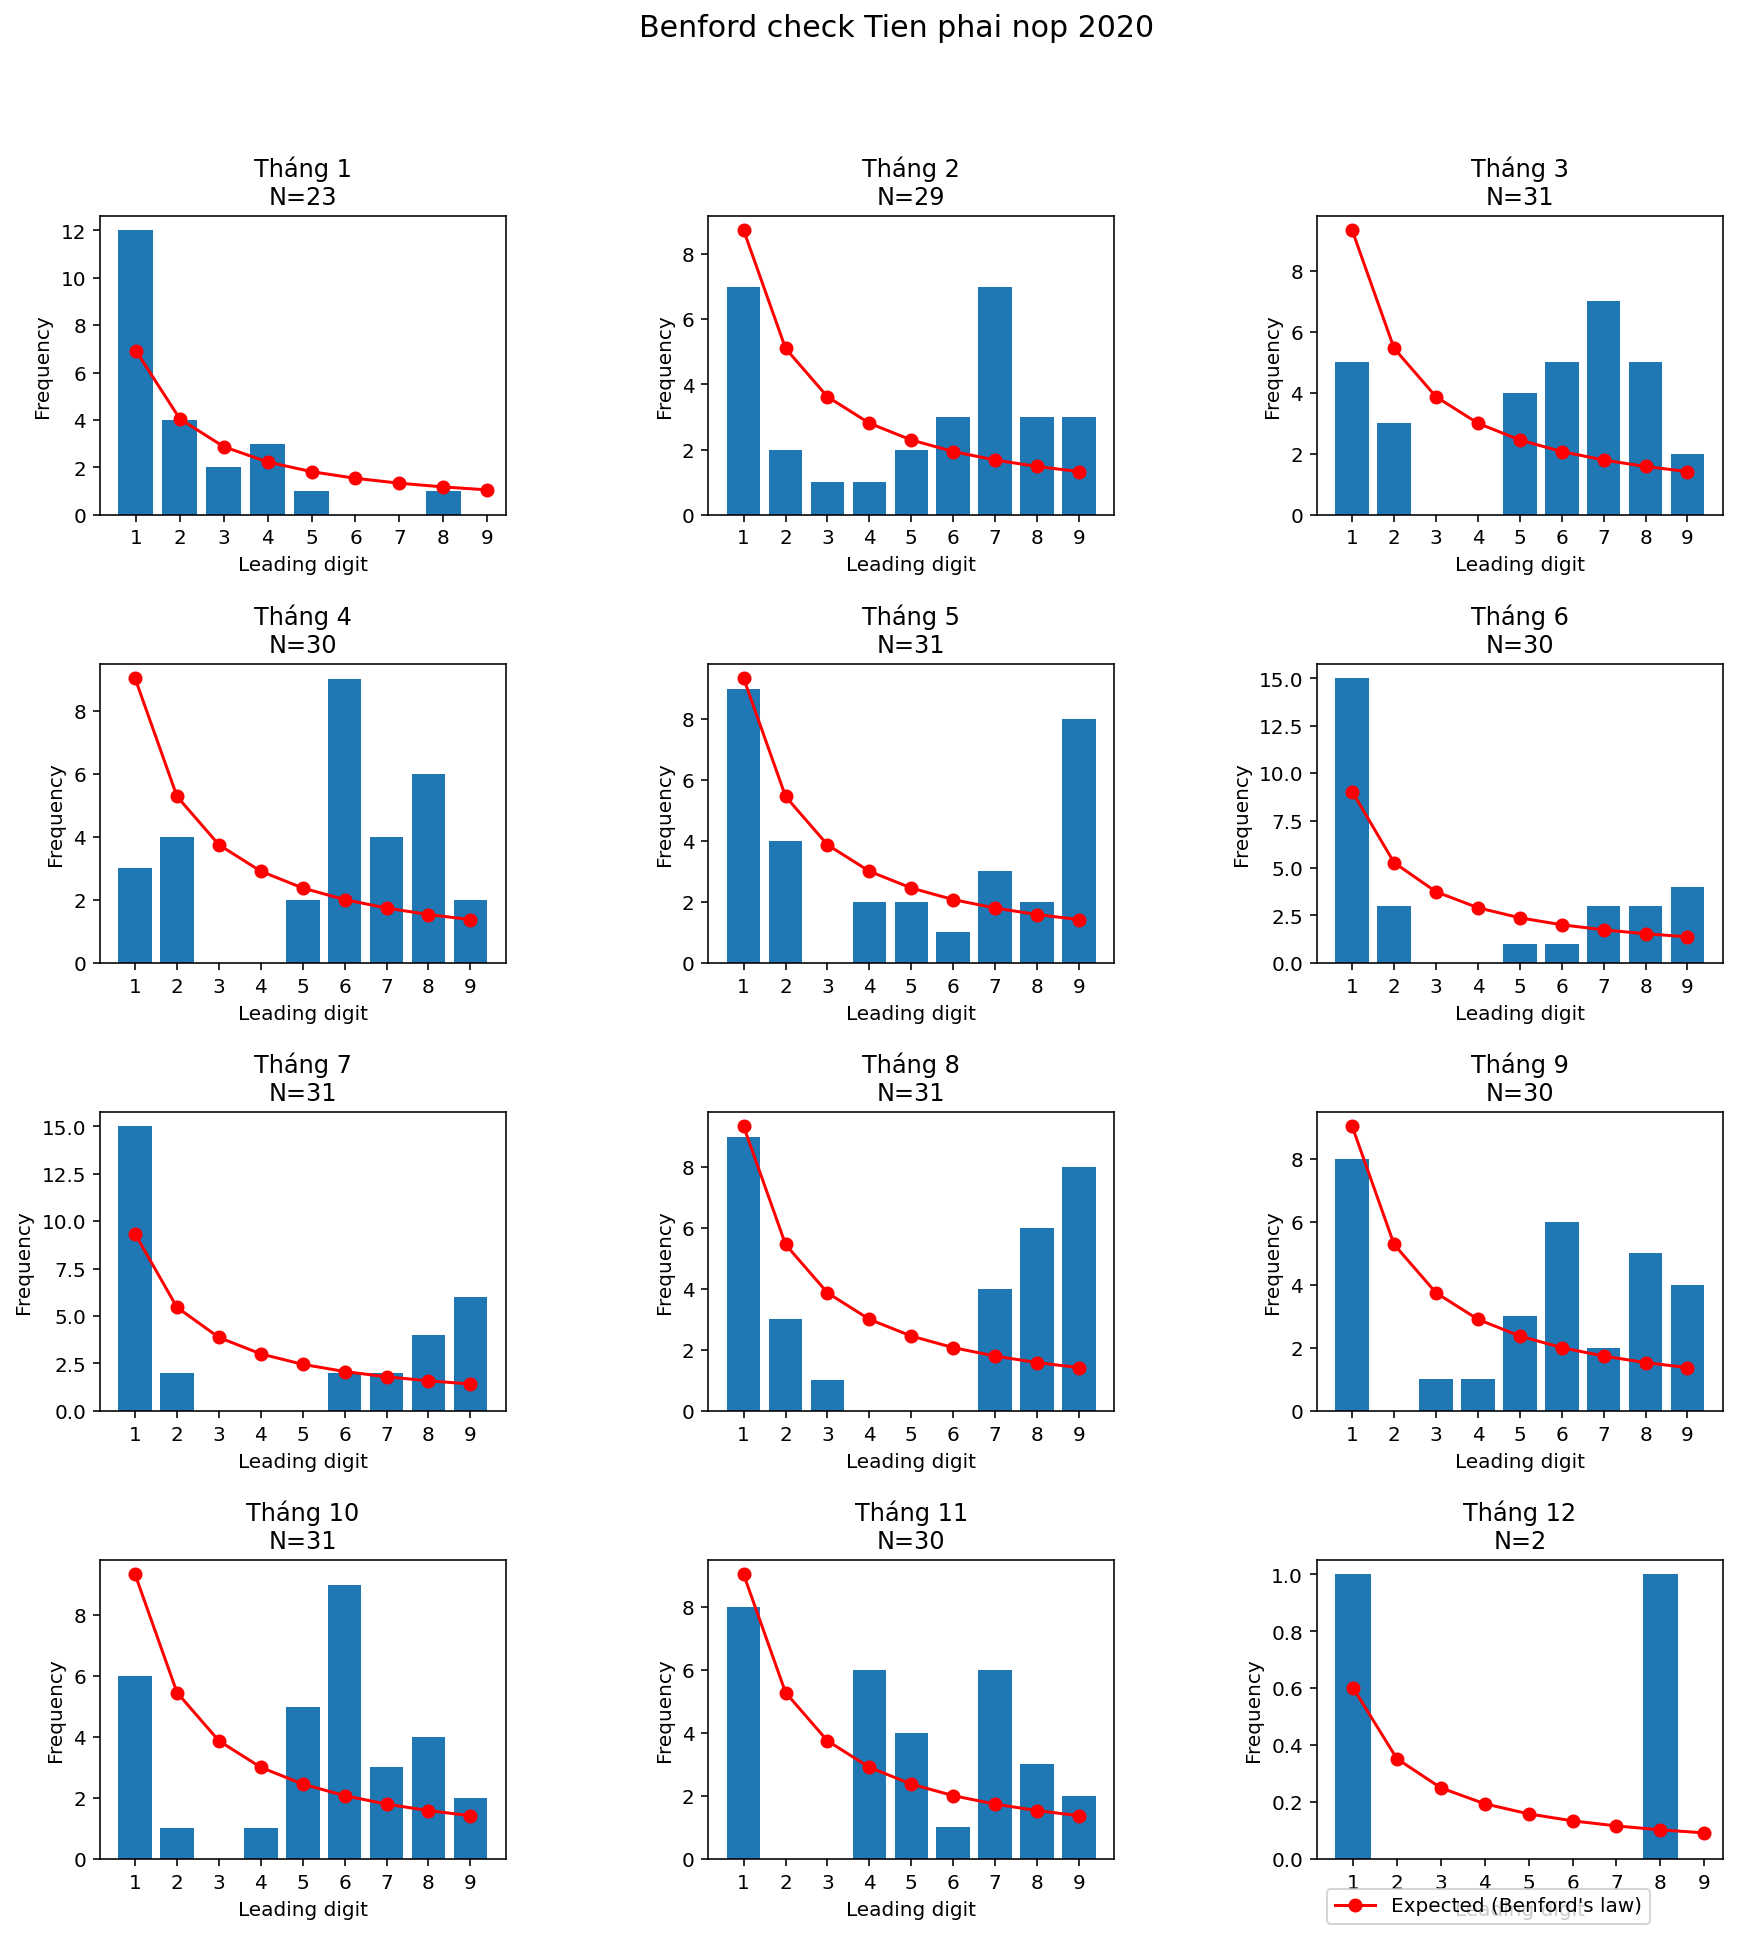

In [41]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

axs = np.array(axs).flatten()


plt.subplots_adjust(hspace=0.5, wspace=0.5)

# check with benford's law
digit = np.arange(1, 10)

months = phai_nop['Thang'].unique()
# print(type(months))

for i in range(len(axs)):
    ax = axs[i]
    
    data = phai_nop.groupby(['Thang', 'Ngay nop tien']).sum()
    # print(data)
    month = months[i]
    # print(month)
    digits = data.loc[month]['Tien phai nop'].astype(str).str[0].astype(int)
    # print(digits)
    
    N = len(phai_nop[phai_nop['Thang'] == month]['Ngay nop tien'])  # len for each month
    # print(f'Thang: {month} - {N}')
    expected = np.log10(1 + 1/digit)*N  # => expected number of digit following benford's law
    
    v = digits.value_counts()
    # print(v)
    ax.bar(v.index, v.values)  # plot following probability of the number of digits in month
    ax.set_xticks(range(1, 10))
    
    ax.plot(digit, expected, marker='o', color='red', label='Expected (Benford\'s law)')
    ax.set_title("Tháng %s\nN=%d" % (month, N))
    ax.set_xlabel("Leading digit")
    ax.set_ylabel("Frequency")
    
plt.legend(loc=3, bbox_to_anchor=(0.0, -0.25))
plt.suptitle("Benford check Tien phai nop 2020", fontsize=15)

In [42]:
del sao_ke['TK nộp ']
del sao_ke['Ngày đúng']
del sao_ke['Code']
sao_ke_headers = {
    'Tháng': 'Thang',
    'Ngày nộp tiền': 'Ngay nop tien',
    'Số tiền': 'So tien',
    'Ngân hàng': 'Ngan hang',
    'Nội dung': 'Noi dung',
}

sao_ke = sao_ke.rename(columns=sao_ke_headers)
sao_ke.head()
# sao_ke.tail()

,Thang,Ngay nop tien,So tien,Ngan hang,Noi dung
0,1,2020-01-03,1380329000,MB,2275-NOP COD NGAY 2.1.2020 THU TAI KHO
1,1,2020-01-04,69177000,MB,2275- NOP COD GHN NGAY 3.1.2020
2,1,2020-01-04,100053000,MB,2275 NOP COD GHN NGAY 3.1.2020
3,1,2020-01-04,25678000,MB,2275 NOP COD GHN NGAY 3.1.2020
4,1,2020-01-04,170162000,MB,2275 NOP COD GHN NGAY 2/1/2020 THU TAI KHO


Text(0.5, 0.98, 'Benford check Tien thuc nop 2020')

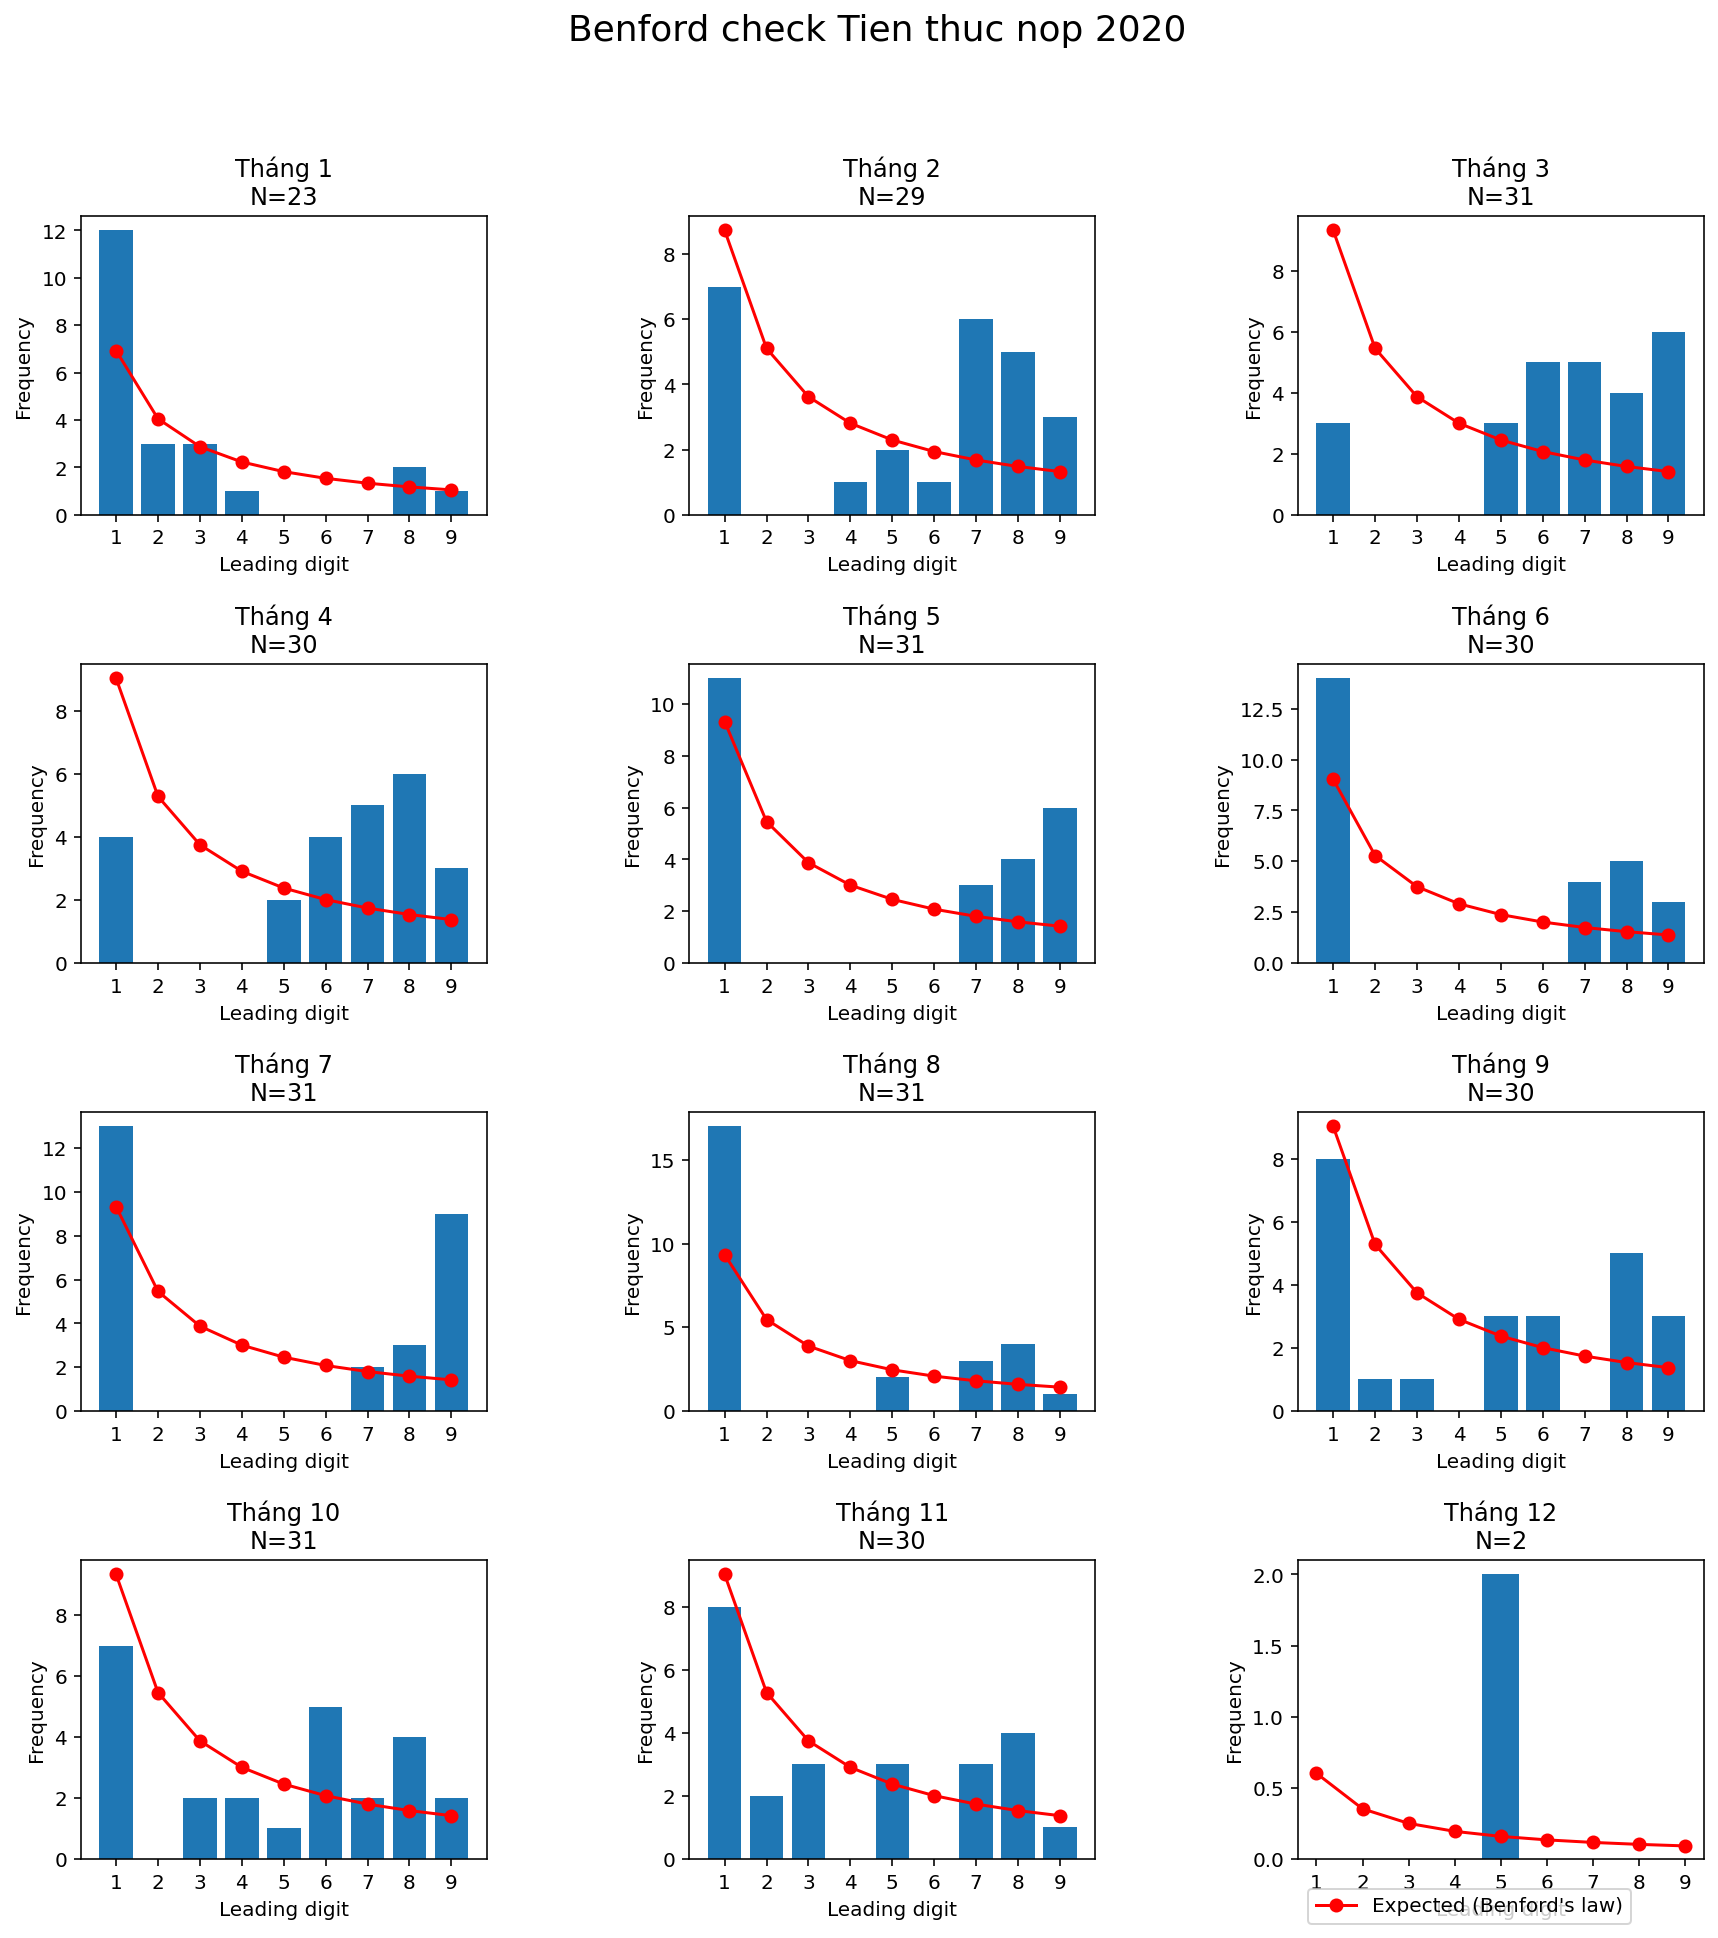

In [43]:
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

axs = np.array(axs).flatten()


plt.subplots_adjust(hspace=0.5, wspace=0.5)

# check with benford's law
digit = np.arange(1, 10)

months = sao_ke['Thang'].unique()
# print(type(months))

for i in range(len(axs)):
    ax = axs[i]
    
    data = sao_ke.groupby(['Thang', 'Ngay nop tien']).sum()
    # print(data)
    month = months[i]
    # print(month)
    digits = data.loc[month]['So tien'].astype(str).str[0].astype(int)
    # print(digits)
    
    N = len(phai_nop[phai_nop['Thang'] == month]['Ngay nop tien'])  # len for each month
    # print(f'Thang: {month} - {N}')
    expected = np.log10(1 + 1/digit)*N  # expected number of digit following benford's law
    
    v = digits.value_counts()
    # print(v)
    ax.bar(v.index, v.values)  # plot following probability of the number of digits in month
    ax.set_xticks(range(1, 10))
    
    ax.plot(digit, expected, marker='o', color='red', label='Expected (Benford\'s law)')
    ax.set_title("Tháng %s\nN=%d" % (month, N))
    ax.set_xlabel("Leading digit")
    ax.set_ylabel("Frequency")
    

plt.legend(loc=3, bbox_to_anchor=(0.0, -0.25))
plt.suptitle("Benford check Tien thuc nop 2020", fontsize=18)

In [44]:
# year

phai_nop.head()

,Thang,Ngay tao phieu thu,Ngay nop tien,Tien phai nop
0,1,2020-01-02,2020-01-03,1383656456
1,1,2020-01-03,2020-01-04,1070303858
2,1,2020-01-04,2020-01-05,1142495754
3,1,2020-01-05,2020-01-06,485525621
4,1,2020-01-06,2020-01-07,2027625258


1    98
8    43
9    41
7    41
6    37
2    26
5    24
4    14
3     5
Name: Tien phai nop, dtype: int64


Text(0, 0.5, 'Frequency')

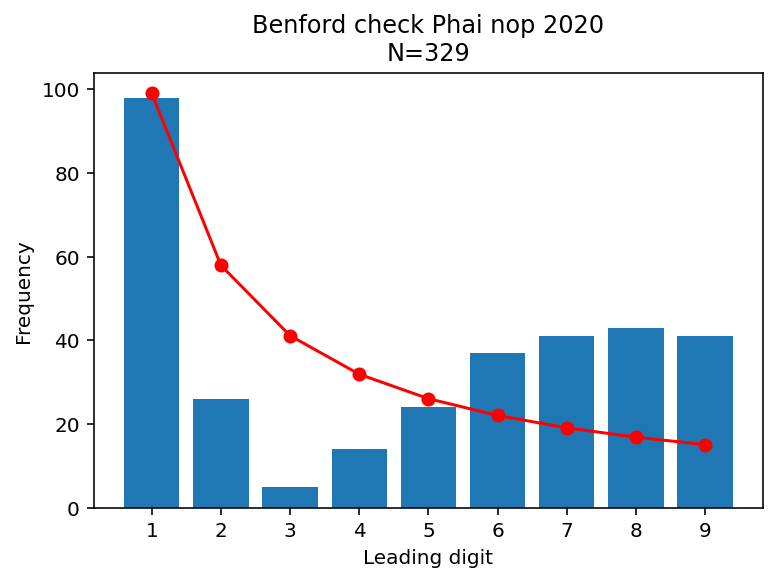

In [45]:
# phai_nop follow year

fg, ax = plt.subplots()
fig.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

digit = np.arange(1, 10)

months = phai_nop['Thang'].unique()

months

data = phai_nop.groupby(['Thang', 'Ngay nop tien']).sum()
digits = data['Tien phai nop'].astype(str).str[0].astype(int)

N = len(phai_nop['Tien phai nop'])

expected = np.log10(1 + 1/digit)*N
v = digits.value_counts()
print(v)
ax.bar(v.index, v.values)  # plot following probability of the number of digits in month
ax.set_xticks(range(1, 10))
    
ax.plot(digit, expected, marker='o', color='red', label='Expected (Benford\'s law)')
ax.set_title("Benford check Phai nop 2020\nN=%d" % (N))
ax.set_xlabel("Leading digit")
ax.set_ylabel("Frequency")

1    104
8     46
9     38
7     33
6     18
5     18
3      9
2      6
4      4
Name: So tien, dtype: int64


Text(0, 0.5, 'Frequency')

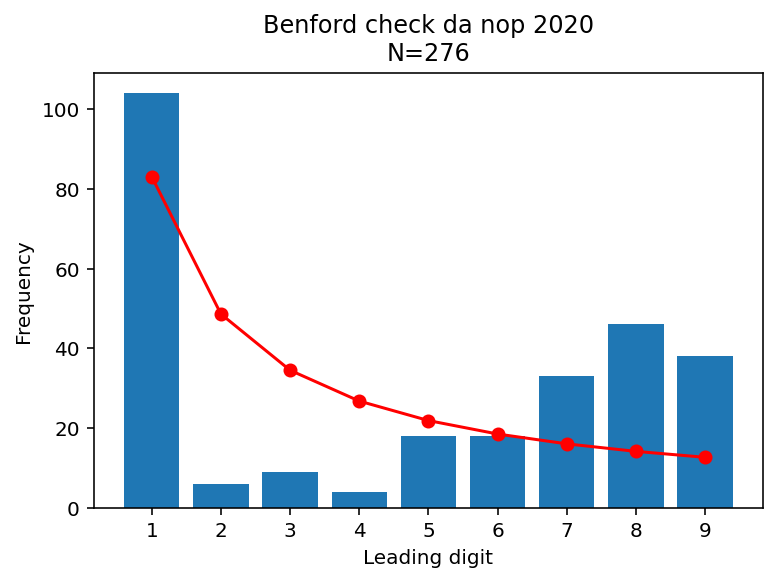

In [46]:
# sao_ke follow year

fg, ax = plt.subplots()
fig.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])

digit = np.arange(1, 10)

months = sao_ke['Thang'].unique()


data = sao_ke.groupby(['Thang', 'Ngay nop tien']).sum()
digits = data['So tien'].astype(str).str[0].astype(int)

N = len(data['So tien'])

expected = np.log10(1 + 1/digit)*N
v = digits.value_counts()
print(v)
ax.bar(v.index, v.values)  # plot following probability of the number of digits in month
ax.set_xticks(range(1, 10))
    
ax.plot(digit, expected, marker='o', color='red', label='Expected (Benford\'s law)')
ax.set_title("Benford check da nop 2020\nN=%d" % (N))
ax.set_xlabel("Leading digit")
ax.set_ylabel("Frequency")

In [47]:
sao_ke_group = sao_ke.groupby(['Ngay nop tien']).sum()
# sao_ke_group.tail()
sao_ke_group.reset_index(inplace=True)  # convert index to column 
sao_ke_group.head()

,Ngay nop tien,Thang,So tien
0,2020-01-03,1,1380329000
1,2020-01-04,5,1039529000
2,2020-01-05,7,1167496000
3,2020-01-06,3,482085000
4,2020-01-07,3,2031066000


In [48]:
# data = pd.merge(phai_nop, sao_ke_group, on=['Ngay nop tien'])  # join 2 tables to get corresponding between tien phai nop and tien da nop
# data.head()  # here we got the main data to compare

data = phai_nop.merge(sao_ke_group, on='Ngay nop tien', how='left')
# data = data.loc['Thang_y', 'So tien'].astype(int)
data = data.fillna(0)
data

,Thang_x,Ngay tao phieu thu,Ngay nop tien,Tien phai nop,Thang_y,So tien
0,1,2020-01-02,2020-01-03,1383656456,1.0,1380329000.0
1,1,2020-01-03,2020-01-04,1070303858,5.0,1039529000.0
2,1,2020-01-04,2020-01-05,1142495754,7.0,1167496000.0
3,1,2020-01-05,2020-01-06,485525621,3.0,482085000.0
4,1,2020-01-06,2020-01-07,2027625258,3.0,2031066000.0
...,...,...,...,...,...,...
324,11,2020-11-27,2020-11-28,718664454,22.0,271809000.0
325,11,2020-11-28,2020-11-29,458550141,0.0,0.0
326,11,2020-11-29,2020-11-30,111888463,55.0,1290541000.0
327,12,2020-11-30,2020-12-01,1224277567,48.0,506250000.0


In [49]:
del data['Thang_y']

In [50]:
named = {
    'Thang_x': 'Thang',
    'So tien': 'Tien da nop'
}

data = data.rename(columns=named)
# data.head()
data['Tien da nop'].astype(int)

0      1380329000
1      1039529000
2      1167496000
3       482085000
4      2031066000
          ...    
324     271809000
325             0
326    1290541000
327     506250000
328     550000000
Name: Tien da nop, Length: 329, dtype: int64

In [51]:

chenh_lech = data['Tien phai nop'] - data['Tien da nop']
data['Chenh lech'] = chenh_lech
# data.head()
data

,Thang,Ngay tao phieu thu,Ngay nop tien,Tien phai nop,Tien da nop,Chenh lech
0,1,2020-01-02,2020-01-03,1383656456,1380329000.0,3327456.0
1,1,2020-01-03,2020-01-04,1070303858,1039529000.0,30774858.0
2,1,2020-01-04,2020-01-05,1142495754,1167496000.0,-25000246.0
3,1,2020-01-05,2020-01-06,485525621,482085000.0,3440621.0
4,1,2020-01-06,2020-01-07,2027625258,2031066000.0,-3440742.0
...,...,...,...,...,...,...
324,11,2020-11-27,2020-11-28,718664454,271809000.0,446855454.0
325,11,2020-11-28,2020-11-29,458550141,0.0,458550141.0
326,11,2020-11-29,2020-11-30,111888463,1290541000.0,-1178652537.0
327,12,2020-11-30,2020-12-01,1224277567,506250000.0,718027567.0


In [52]:
data_1 = data.groupby(['Thang']).sum()
data_1.reset_index(inplace=True)
data_1['Chenh lech'].sum()

data_1

,Thang,Tien phai nop,Tien da nop,Chenh lech
0,1,27425765092,27145160600.0,280604492.0
1,2,21815254653,21940925000.0,-125670347.0
2,3,21396682577,21337319068.0,59363509.0
3,4,20661138017,19988190298.0,672947719.0
4,5,24526853915,24452641210.0,74212705.0
5,6,26304681482,26483755068.0,-179073586.0
6,7,27905849468,27409637035.0,496212433.0
7,8,26069218775,26252505000.0,-183286225.0
8,9,21509509317,21778232500.0,-268723183.0
9,10,20520640551,19661926026.0,858714525.0


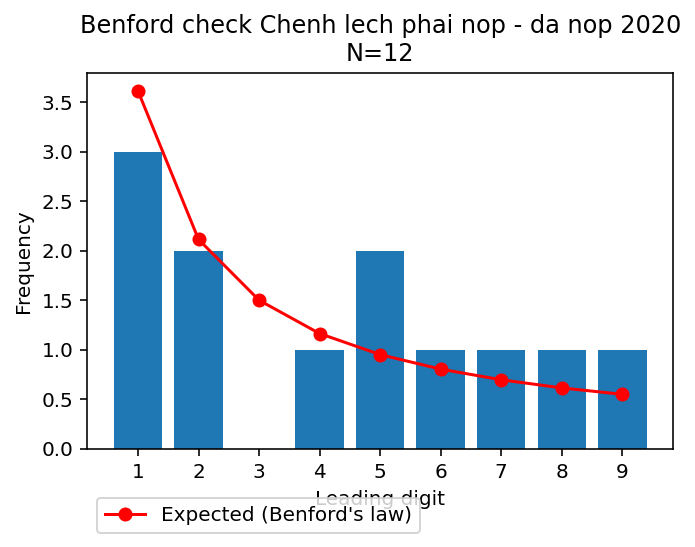

In [53]:
# draw...
fig, ax = plt.subplots()
fig.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])


# check with benford's law
digit = np.arange(1, 10)

months = data['Thang'].unique()


digits = data_1['Chenh lech'].apply(lambda x: abs(x)).astype(str).str[0].astype(int)

    
N = len(data_1['Chenh lech'])  # len for each month

expected = np.log10(1 + 1/digit)*N  # => expected number of digit following benford's law
    
v = digits.value_counts()

ax.bar(v.index, v.values)  # plot following probability of the number of digits in month
ax.set_xticks(range(1, 10))
    
ax.plot(digit, expected, marker='o', color='red', label='Expected (Benford\'s law)')
ax.set_title("Benford check Chenh lech phai nop - da nop 2020\nN=%d" % (N))
ax.set_xlabel("Leading digit")
ax.set_ylabel("Frequency")
    
plt.legend(loc=3, bbox_to_anchor=(0.0, -0.25))


In [54]:
data_1['Chenh lech'].sum()

2107775461.0

Như ta đã thấy, đường màu đỏ thể hiện cho kì vọng sự xuất hiện của các chữ số từ 1-9 theo luật Benford.
Các cột màu xanh thể hiện cho số lần xuất hiện của các chữ số đầu tiên của cột `Chenh lech` trong bảng `data_1`
Suy ra: Có gian lận ở các khoảng chênh lệch bắt đầu bằng các chữ số 5, 6, 7, 8, 9